In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

# Selecting the initial comparison point
##### I will be comparing the average score of the 2017 Physics Regents results from Brooklyn Technical High School to other specialized high schools in NYC.
##### The syntax used here is far from efficient- I queried the data and assigned it a new variable each time. I suppose it could be useful if I had to go back and analyze different subsets of the data.

In [83]:
bktech_phys = df[(df["School Name"] == "Brooklyn Technical High School") & (df["Regents Exam"] == "Physical Settings/Physics")]
# find all instances of school name brooklyn tech and physics regents exam and assign to a variable

In [84]:
bktech_phys_17 = bktech_phys.loc[bktech_phys["Year"] == 2017]
# narrow it down further to 2017 and assign that to a variable

In [85]:
bktech_phys_17["Mean Score"] = bktech_phys_17["Mean Score"].astype(float)
# convert the data type of the mean score column to float so that it can be used for calculation

<ipython-input-85-2ae97639e0d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bktech_phys_17["Mean Score"] = bktech_phys_17["Mean Score"].astype(float)


# Selecting additional comparison points
##### As I will be comparing the same measure across 8 other high schools, I will use similar syntax to the above.

Bronx High School of Science

In [161]:
bxsci_phys = df[(df["School Name"] == "Bronx High School of Science") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [162]:
bxsci_phys_17 = bxsci_phys.loc[bxsci_phys["Year"] == 2017]

In [163]:
bxsci_phys_17 = bxsci_phys_17.drop(31888, axis=0).drop(31887, axis=0)
# this subset contains invalid values for mean score, so I chose to drop those rows
# my reasoning is that barring any major outliers, the average should still be usable if not just slightly more inaccurate

In [164]:
bxsci_phys_17["Mean Score"] = bxsci_phys_17["Mean Score"].astype(float)

Brooklyn Latin School

In [165]:
bklatin_phys = df[(df["School Name"] == "Brooklyn Latin School, The") & (df["Regents Exam"] == "Physical Settings/Physics")]
# there doesn't appear to be any data on this particular query, so unfortunately I can't use this school for my comparison
# i really can't think of any reasons why this data might be missing, but in any case I'm going to exclude it from my analysis

Fiorello H. LaGuardia High School of Music & Art and Performing Arts

In [103]:
laghs_phys = df[(df["School DBN"] == "03M485") & (df["Regents Exam"] == "Physical Settings/Physics")]
# the school name is cut off and i'm unsure of how to view the full thing, so i am querying by DBN this time

In [105]:
laghs_phys_17 = laghs_phys.loc[laghs_phys["Year"] == 2017]

In [107]:
laghs_phys_17 = laghs_phys_17.drop(24335, axis=0).drop(24336, axis=0)

In [109]:
laghs_phys_17["Mean Score"] = laghs_phys_17["Mean Score"].astype(float)

High School for Math, Science, and Engineering at City College

In [126]:
hsmse_phys = df[(df["School DBN"] == "05M692") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [128]:
hsmse_phys_17 = hsmse_phys.loc[hsmse_phys["Year"] == 2017]

In [130]:
hsmse_phys_17 = hsmse_phys_17.drop(153905, axis=0).drop(153907, axis=0)

In [132]:
hsmse_phys_17["Mean Score"] = hsmse_phys_17["Mean Score"].astype(float)

High School of American Studies at Lehman College

In [135]:
amstud_phys = df[(df["School Name"] == "High School of American Studies at Lehman College") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [137]:
amstud_phys_17 = amstud_phys.loc[amstud_phys["Year"] == 2017]

In [139]:
amstud_phys_17 = amstud_phys_17.drop(32393, axis=0).drop(32394, axis=0).drop(166444, axis=0).drop(166446, axis=0)

In [140]:
amstud_phys_17["Mean Score"] = amstud_phys_17["Mean Score"].astype(float)

Queens High School for the Sciences at York College

In [167]:
qhss_phys = df[(df["School DBN"] == "28Q687") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [169]:
qhss_phys_17 = qhss_phys.loc[qhss_phys["Year"] == 2017]

In [172]:
qhss_phys_17 = qhss_phys_17.drop(199518, axis=0).drop(199519, axis=0).drop(199520, axis=0).drop(199521, axis=0)

In [174]:
qhss_phys_17["Mean Score"] = qhss_phys_17["Mean Score"].astype(float)

Staten Island Technical High School

In [177]:
sitech_phys = df[(df["School Name"] == "Staten Island Technical High School") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [179]:
sitech_phys_17 = sitech_phys.loc[sitech_phys["Year"] == 2017]

In [181]:
sitech_phys_17 = sitech_phys_17.drop(205593, axis=0).drop(205591, axis=0).drop(50255, axis=0).drop(50254, axis=0)

In [183]:
sitech_phys_17["Mean Score"] = sitech_phys_17["Mean Score"].astype(float)

Stuyvesant High School

In [186]:
stuy_phys = df[(df["School Name"] == "Stuyvesant High School") & (df["Regents Exam"] == "Physical Settings/Physics")]

In [187]:
stuy_phys_17 = stuy_phys.loc[stuy_phys["Year"] == 2017]

In [189]:
stuy_phys_17 = stuy_phys_17.drop(22235, axis=0).drop(22236, axis=0).drop(146102, axis=0).drop(146103, axis=0)

In [191]:
stuy_phys_17["Mean Score"] = stuy_phys_17["Mean Score"].astype(float)

# Creating a new DataFrame
##### After a bit of cleaning I take the relevant data points from the original dataset and load them into an entirely new one.
##### This is probably unnecessary but it allows me to more clearly interpret the data at a glance, even without any visualizations.

In [216]:
data = {
    "School" : [
        "Brooklyn Technical High School",
        "Bronx High School of Science",
        "LaGuardia HS of Music & Art and Performing Arts",
        "HS for Math, Science, and Engineering at City College",
        "High School of American Studies at Lehman College",
        "Queens High School for the Sciences at York College",
        "Staten Island Technical High School",
        "Stuyvesant High School"
    ],
    "Average" : [
        bktech_phys_17["Mean Score"].mean(),
        bxsci_phys_17["Mean Score"].mean(),
        laghs_phys_17["Mean Score"].mean(),
        hsmse_phys_17["Mean Score"].mean(),
        amstud_phys_17["Mean Score"].mean(),
        qhss_phys_17["Mean Score"].mean(),
        sitech_phys_17["Mean Score"].mean(),
        stuy_phys_17["Mean Score"].mean()
    ]
}
phys_regents = pd.DataFrame(data)
phys_regents

,School,Average
0,Brooklyn Technical High School,81.666667
1,Bronx High School of Science,89.110000
2,LaGuardia HS of Music & Art and Performing Arts,75.830000
3,"HS for Math, Science, and Engineering at City ...",82.110000
4,High School of American Studies at Lehman College,88.487500
5,Queens High School for the Sciences at York Co...,88.528571
6,Staten Island Technical High School,85.187500
7,Stuyvesant High School,91.012500


# Visualization and Findings

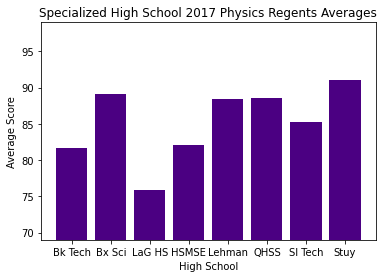

In [249]:
x = np.array(["Bk Tech", "Bx Sci", "LaG HS", "HSMSE", "Lehman", "QHSS", "SI Tech", "Stuy"])
y = np.array([81.67, 89.11, 75.83, 82.11, 88.49, 88.53, 85.19, 91.01])

plt.title("Specialized High School 2017 Physics Regents Averages")
plt.ylabel("Average Score")
plt.xlabel("High School")

low = min(y)
high = max(y)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.bar(x,y,color="Indigo")
plt.show()

##### With an average of roughly 82%, Brooklyn Technical High School's 2017 Physics Regents average is in the lower quartile when compared to the other specialized high schools in the city. It ranks 7th out of 8th place.
##### As Brooklyn Tech is the largest high school in NYC, I can't think of a reason to question this healthy sample size.

# Project Takeaways
##### I would have liked to consolidate my queries better to make the code more comprehensive.
##### I also set out to write a function that would systematically load the relevant data for me, but this proved to be beyond my current skill level and I eventually abandonded the idea.
##### I struggled to come up with more interesting ways to visualize the data and settled on a basic bar chart. I tried adding more elements but I found it only obscured the visualization. Surely there are better ways to display something like the average of these schools' averages.
##### My "findings" are also weak, probably because I didn't really set out to answer any particular question or solve any problem...